In [63]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
sns.set(rc={'figure.figsize':(17.0,15.5)})
sns.set(font_scale=1.25)
results ={}
quantizers = ['ffp161', 'ffp162', 'ffp163', 'ffp164','ffp166', 'ffp168']
keys = ['baseline', 'conv1', 'maxpool1', 'conv2', 'maxpool2', 'dense3', 'dense4']
mean_accuracies = list()
mean_times = list()
mean_accuracies_difference = list()
for key in keys:
    mean_acc_of_quant = list()
    mean_time_of_quant = list()
    mean_dif = list()
    for quantizer in quantizers:
        with open ("results_lenet_{0}_{1}.pkl".format(quantizer, key), 'rb') as fp:
            results[key] = pickle.load(fp)
            mean_acc_of_quant.append(results[key]['eval_trimmed_mean_accuracy'])
            mean_time_of_quant.append(results[key]['avg_train_trimmed_mean_time'])
            mean_dif.append(results['baseline']['eval_trimmed_mean_accuracy']-results[key]['eval_trimmed_mean_accuracy'])
    mean_accuracies.append(mean_acc_of_quant)
    mean_times.append(mean_time_of_quant)
    mean_accuracies_difference.append(mean_dif)
#print(mean_accuracies)
#print(mean_times)

Text(0, 0.5, 'Accuracy')

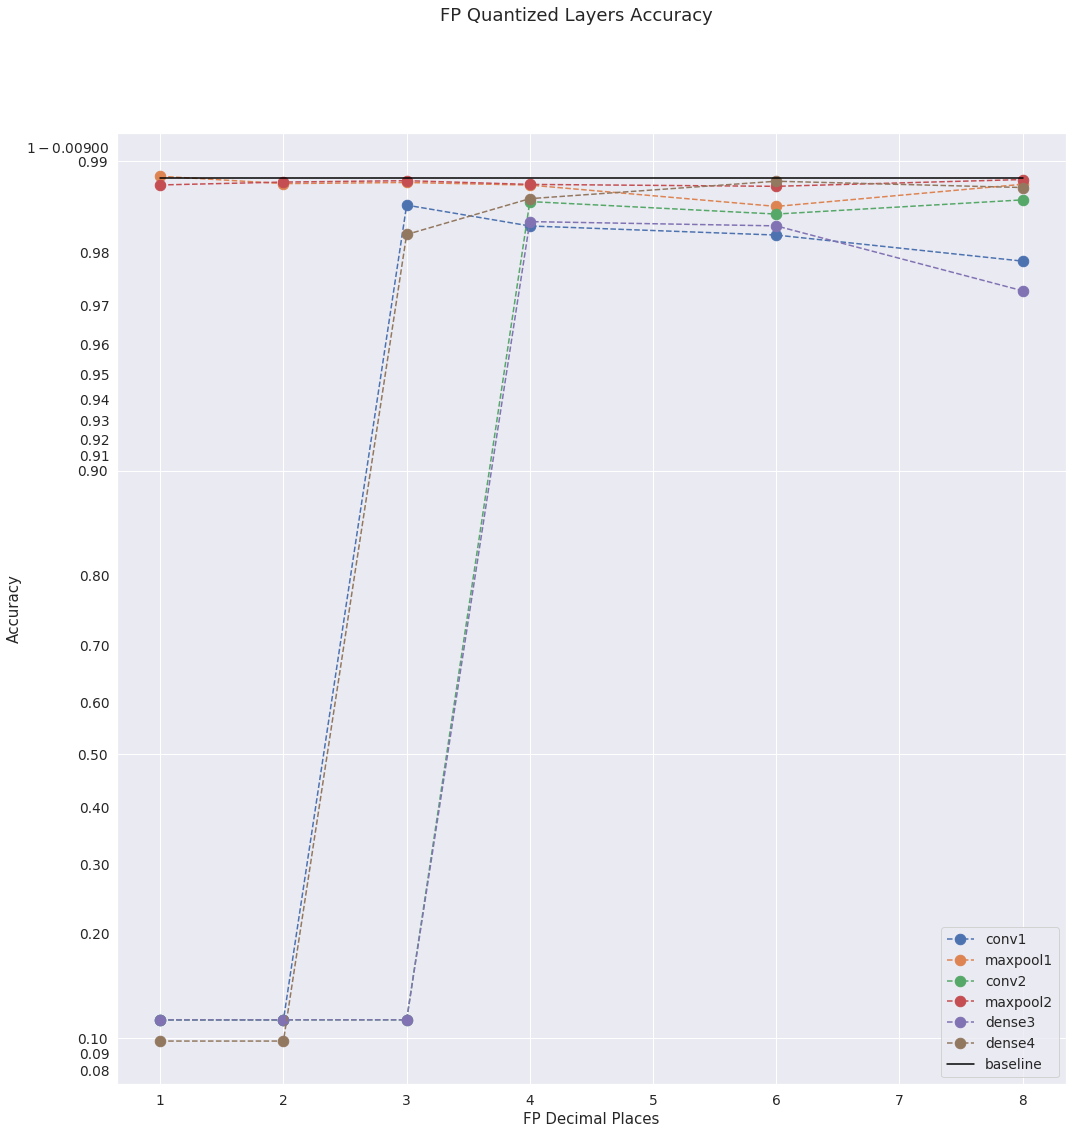

In [49]:
plt.figure()
plt.suptitle('FP Quantized Layers Accuracy')
gridx = 2
gridy = 5
quantizer_val = [1, 2, 3, 4, 6, 8]
for i in range (1, len(mean_accuracies)):
    plt.plot(quantizer_val, mean_accuracies[i], label = keys[i], marker='o', markersize='10.5', linestyle='--')
    plt.yscale('logit')
plt.plot(quantizer_val, mean_accuracies[0], label = "baseline", color = "black", linestyle='-')
plt.legend()
plt.xlabel('FP Decimal Places')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Difference')

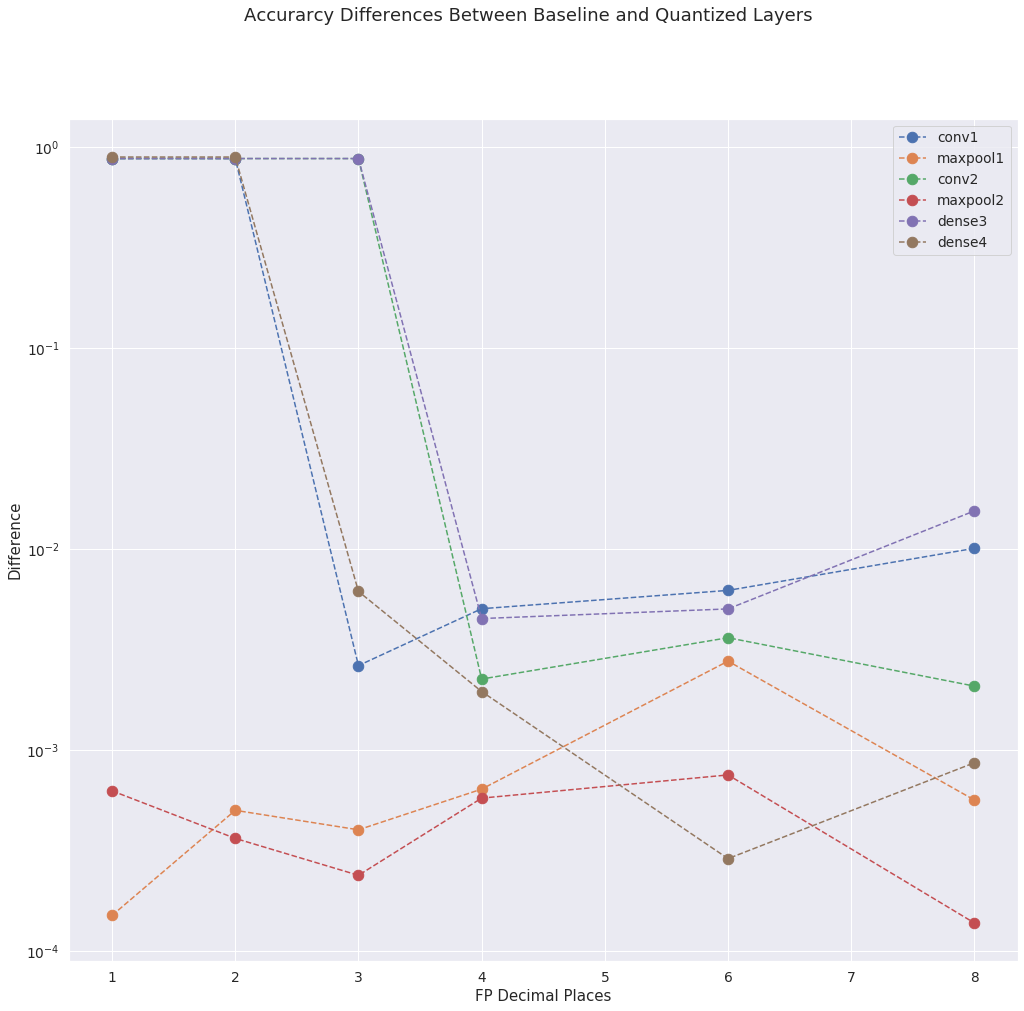

In [54]:
plt.figure()
plt.suptitle('Accurarcy Differences Between Baseline and Quantized Layers')
gridx = 2
gridy = 5
quantizer_val = [1, 2, 3, 4, 6, 8]
for i in range (1, len(mean_accuracies)):
    plt.plot(quantizer_val, np.abs(mean_accuracies_difference[i]), label = keys[i], marker='o', markersize='10.5', linestyle='--')
    plt.yscale('log')
plt.legend()
plt.xlabel('FP Decimal Places')
plt.ylabel('Difference')

Text(0, 0.5, 'Training Time (s)')

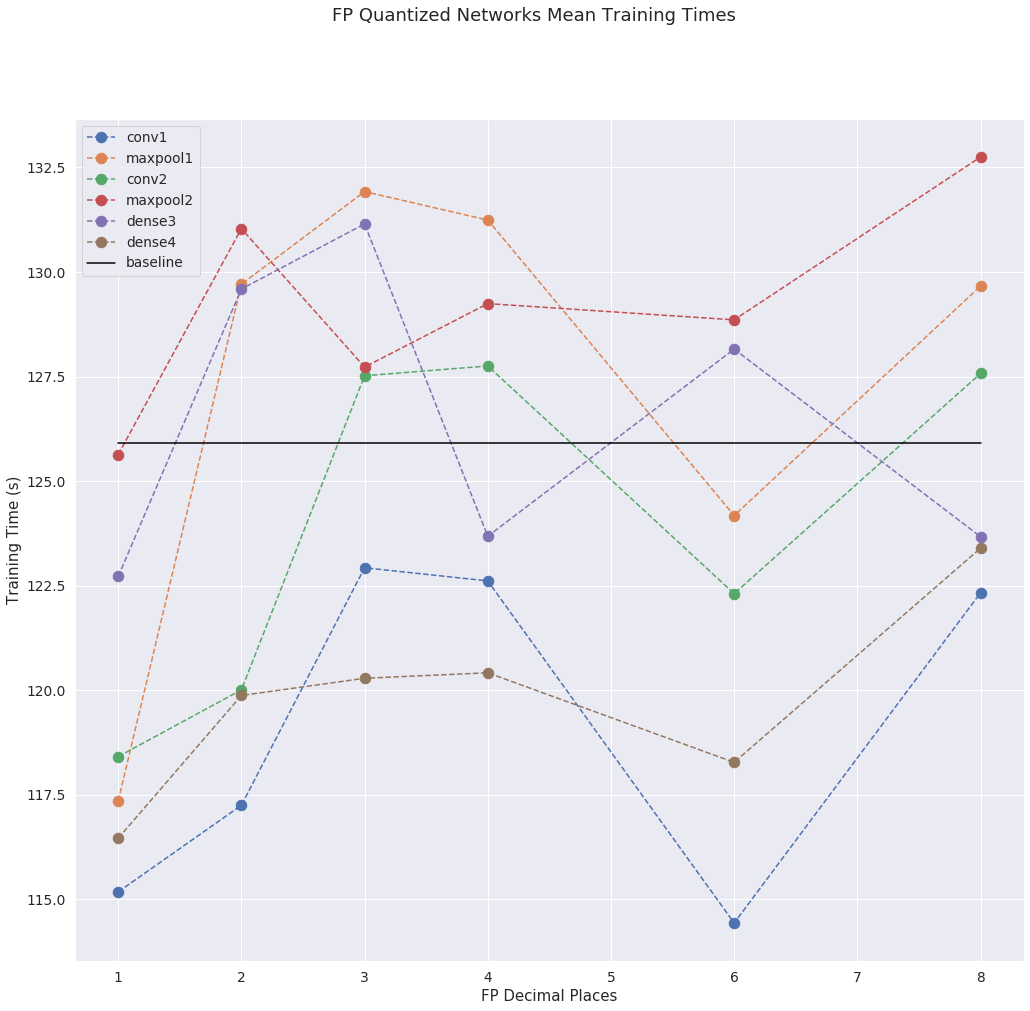

In [59]:
plt.figure()
plt.suptitle('FP Quantized Networks Mean Training Times')
gridx = 2
gridy = 5
quantizer_val = [1, 2, 3, 4, 6, 8]
for i in range (1, len(mean_times)):
    plt.plot(quantizer_val, mean_times[i], label = keys[i], marker='o', markersize='10.5', linestyle='--')
    plt.yscale('linear')
plt.plot(quantizer_val, mean_times[0], label = "baseline", color = "black", linestyle='-')
plt.legend()
plt.xlabel('FP Decimal Places')
plt.ylabel('Training Time (s)')

Text(0, 0.5, 'NLQUE-Score')

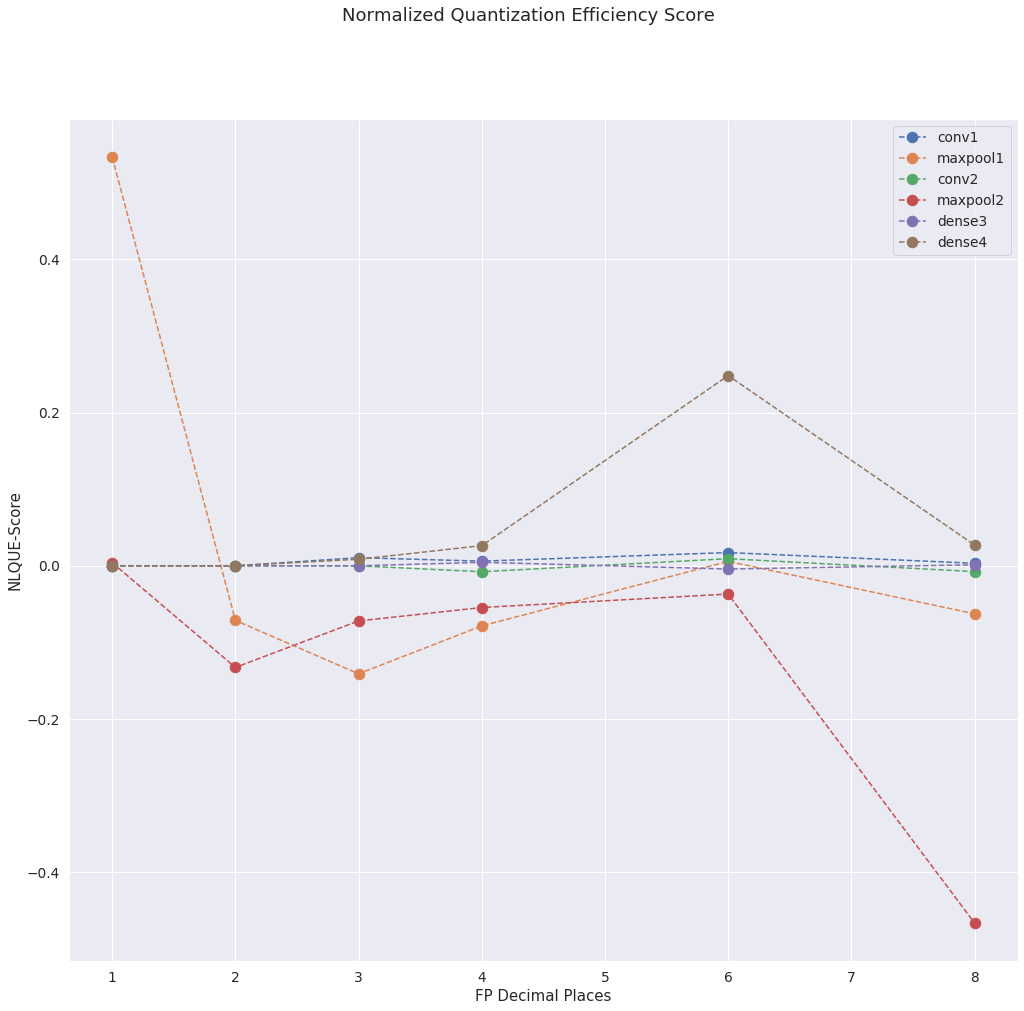

In [61]:
# Normalized Layer Quantization Efficiency Score (Kummer 2020)
# NLQUE = (runtime difference / absolute accuracy loss)
# NLQUE in range -1.0, +1.0. Positive is improvement, negative is degrading
# Algorithm for obtauning best Q-Mapping: 
# 1) QMap all layers individual, pick best NLQUE and set Global best NLQUE. 
# 2) QMap remaining layers, pick best NLQUE
# 3) Carry on until best QMapping is achieved.
# Could also be used in branch and bound strategy?
# Prallelism?
# Mathemaztical analysis?

gain = [[x2 - x1 for (x1, x2) in zip(x, mean_times[0])] for x in mean_times]
#gain
#print(mean_accuracies_difference)
newgain = []
epsilon = 1.0e10
#maxtime, mintime = np.max(mean_times), np.min(mean_times)
#maxdiff, mindiff = np.max(mean_accuracies_difference), np.min(mean_accuracies_difference)

for i in range(1, len(mean_accuracies_difference)):
    newgain.append([ x1/x2 for (x1, x2) in zip(gain[i], 
                    np.abs(mean_accuracies_difference[i]))])
newgain = newgain/(np.max(newgain)-np.min(newgain))
plt.figure()
plt.suptitle('Normalized Quantization Efficiency Score')
gridx = 2
gridy = 5
quantizer_val = [1, 2, 3, 4, 6, 8]
for i in range (0, len(newgain)):
    plt.plot(quantizer_val, newgain[i], label = keys[i+1], marker='o', markersize='10.5', linestyle='--')
    plt.yscale('linear')
plt.legend()
plt.xlabel('FP Decimal Places')
plt.ylabel('NLQUE-Score')